In [1]:
# Import dependencies
import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load and read data
file = r"C:\Users\lenovo\Desktop/airline_satisfaction.csv"
df=pd.read_csv(file,parse_dates=True)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure Arrival Time Convenience,...,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Satisfaction
0,1.0,Male,13,Loyal Customer,Personal Travel,Eco Plus,460,25,18.0,4,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,2.0,Male,25,disloyal Customer,Business travel,Business,235,1,6.0,2,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,3.0,Female,26,Loyal Customer,Business travel,Business,1142,0,0.0,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,4.0,Female,25,Loyal Customer,Business travel,Business,562,11,9.0,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,5.0,Male,61,Loyal Customer,Business travel,Business,214,0,0.0,3,...,5,5,3,3,4,4,3,3,3,satisfied


# Exploratory Data Analysis

In [3]:
# See the shape of data
df.shape

(129880, 23)

In [4]:
# Check if there is any null values
df.isnull().sum()

ID                                      1
Gender                                  0
Age                                     0
Customer Type                           0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Departure Delay                         0
Arrival Delay                         393
Departure Arrival Time Convenience      0
Ease of Online Booking                  0
Gate Location                           0
Food and Drink                          0
Online Boarding                         0
Seat Comfort                            0
Inflight Entertainment                  0
Onboard Service                         0
Leg Room Service                        0
Baggage Handling                        0
Check-in Service                        0
In-flight Service                       0
Cleanliness                             0
Satisfaction                            0
dtype: int64

In [5]:
# Find the percentage of missing value
393/129880

0.003025870033877425

Missing value comprise of 0.3% of the total data

In [6]:
# Use median method to fill missing values
df.fillna(df['Arrival Delay'].median(), inplace = True)

In [7]:
# Find the descriptive information of dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64939.500000,37493.270818,0.0,32469.75,64939.5,97409.25,129879.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129880.0,15.045465,38.416353,0.0,0.00,0.0,13.00,1584.0
Departure Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and Drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


We can see that Flight Distance, Departure Delay and Arrival Delay have high variance

In [8]:
# Find the summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  129880 non-null  float64
 1   Gender                              129880 non-null  object 
 2   Age                                 129880 non-null  int64  
 3   Customer Type                       129880 non-null  object 
 4   Type of Travel                      129880 non-null  object 
 5   Class                               129880 non-null  object 
 6   Flight Distance                     129880 non-null  int64  
 7   Departure Delay                     129880 non-null  int64  
 8   Arrival Delay                       129880 non-null  float64
 9   Departure Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking              129880 non-null  int64  
 11  Gate Location             

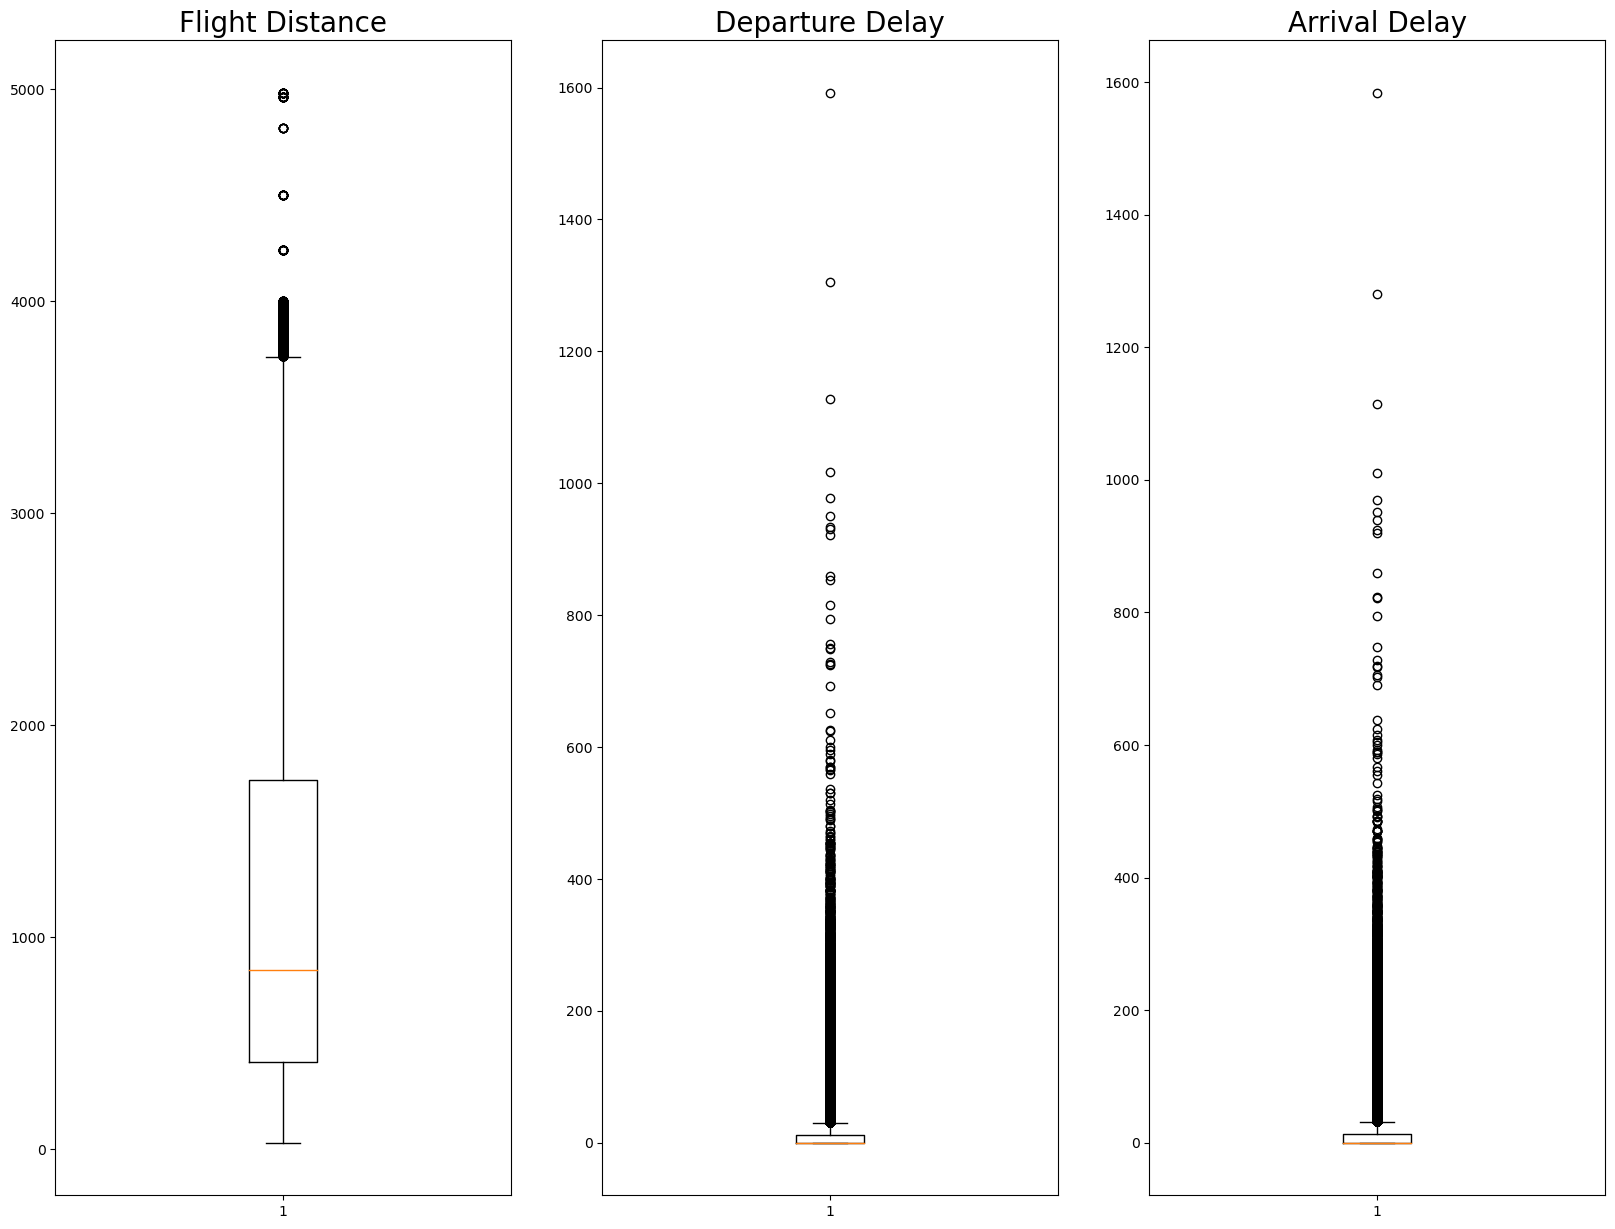

In [9]:
# Inspect Outliers
plt.figure(figsize=(20,15))
check_list=['Flight Distance','Departure Delay','Arrival Delay']
for i in range(len(check_list)):
    plt.subplot(1, len(check_list), i+1) 
    plt.boxplot(df[check_list[i]]) 
    plt.title(check_list[i],fontsize=20)
    
plt.show()

We can see that Flight Distance, Departure Delay and Arrival Delay have some outliers

In [10]:
def copy_df(df):
    return df.copy()

# Remove the outliers 
def outliers(df, column):
    low = np.quantile(df[column], 0.05)
    high = np.quantile(df[column], 0.95)
    return df[df[column].between(low, high, inclusive = 'both')]

df = (df.pipe(copy_df).
          pipe(outliers, "Flight Distance").
          pipe(outliers, "Departure Delay").
          pipe(outliers, "Arrival Delay"))


In [11]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure Arrival Time Convenience,...,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Satisfaction
0,1.0,Male,13,Loyal Customer,Personal Travel,Eco Plus,460,25,18.0,4,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,2.0,Male,25,disloyal Customer,Business travel,Business,235,1,6.0,2,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,3.0,Female,26,Loyal Customer,Business travel,Business,1142,0,0.0,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,4.0,Female,25,Loyal Customer,Business travel,Business,562,11,9.0,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,5.0,Male,61,Loyal Customer,Business travel,Business,214,0,0.0,3,...,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876.0,Male,34,disloyal Customer,Business travel,Business,526,0,0.0,3,...,3,4,4,3,2,4,4,5,4,neutral or dissatisfied
129876,129877.0,Male,23,Loyal Customer,Business travel,Business,646,0,0.0,4,...,4,4,4,4,5,5,5,5,4,satisfied
129877,129878.0,Female,17,Loyal Customer,Personal Travel,Eco,828,0,0.0,5,...,1,2,2,4,3,4,5,4,2,neutral or dissatisfied
129878,129879.0,Male,14,Loyal Customer,Business travel,Business,1127,0,0.0,3,...,4,4,4,3,2,5,4,5,4,satisfied


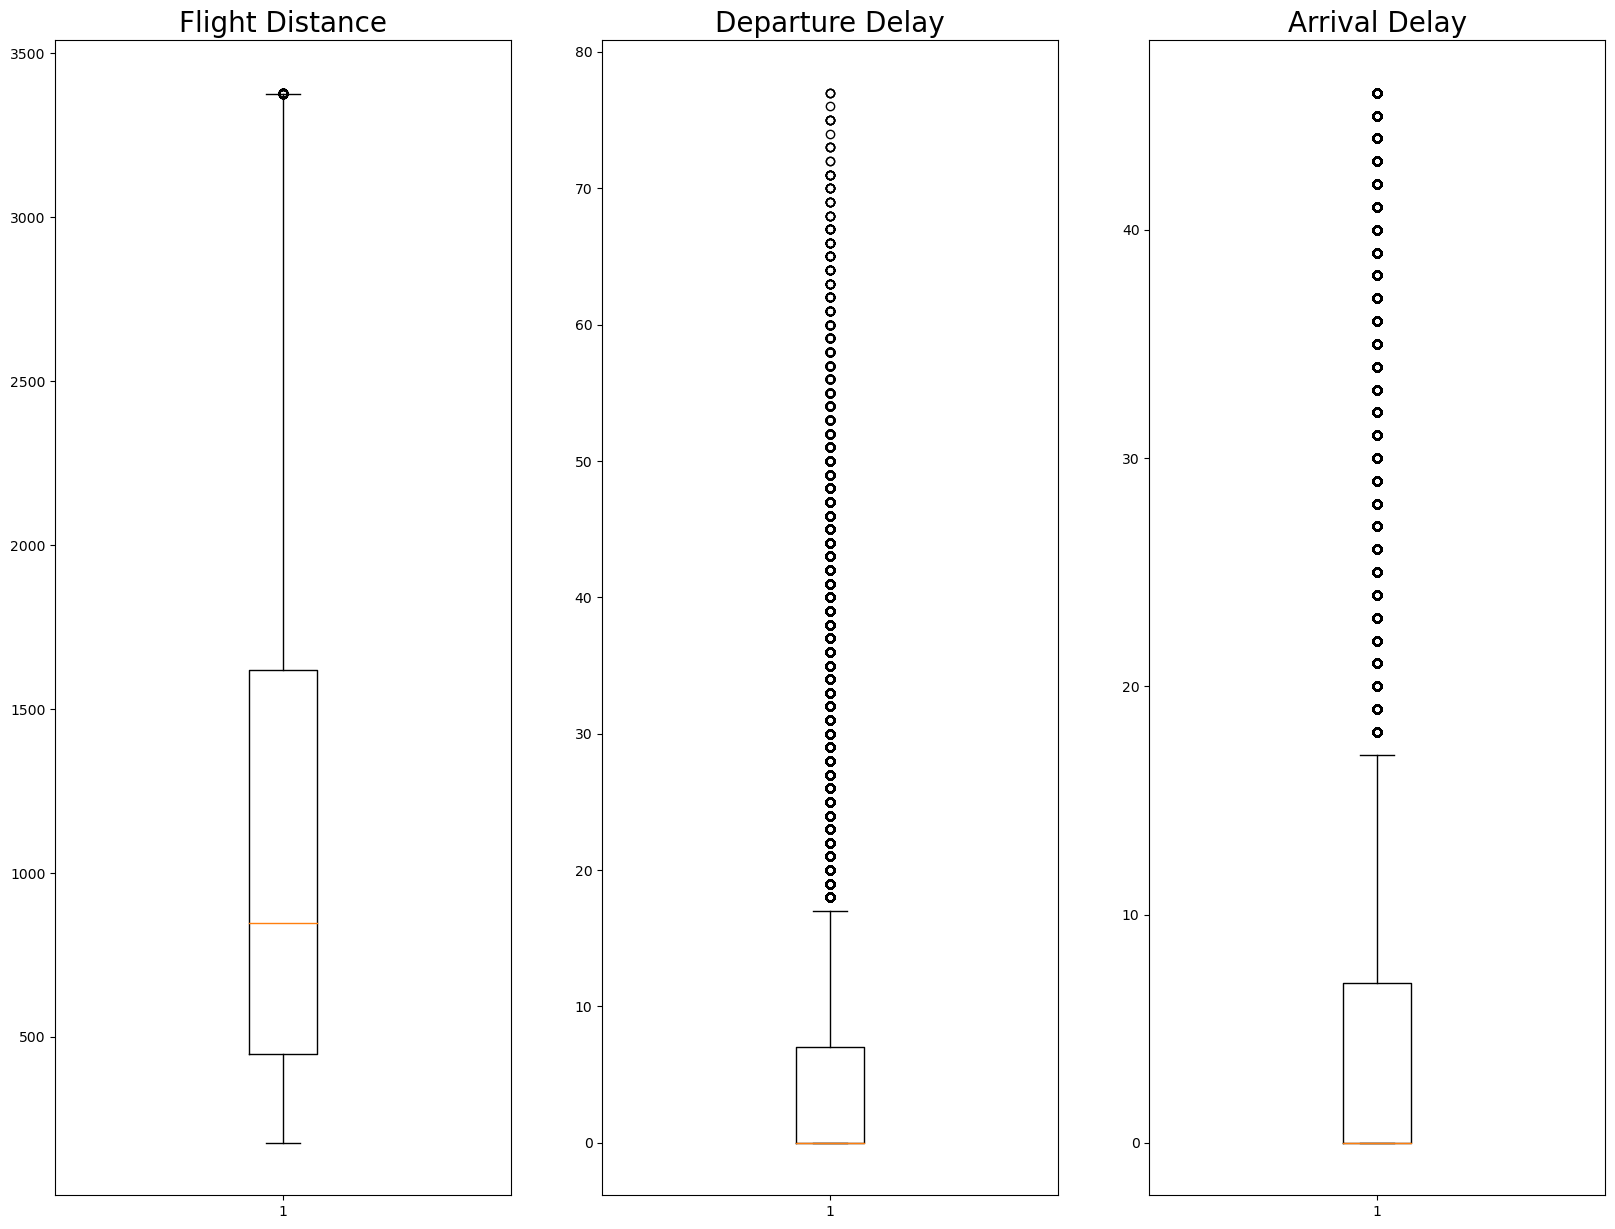

In [12]:
plt.figure(figsize=(20,15))
for i in range(len(check_list)):
    plt.subplot(1, len(check_list), i+1) 
    plt.boxplot(df[check_list[i]]) 
    plt.title(check_list[i],fontsize=20)
    
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105722 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  105722 non-null  float64
 1   Gender                              105722 non-null  object 
 2   Age                                 105722 non-null  int64  
 3   Customer Type                       105722 non-null  object 
 4   Type of Travel                      105722 non-null  object 
 5   Class                               105722 non-null  object 
 6   Flight Distance                     105722 non-null  int64  
 7   Departure Delay                     105722 non-null  int64  
 8   Arrival Delay                       105722 non-null  float64
 9   Departure Arrival Time Convenience  105722 non-null  int64  
 10  Ease of Online Booking              105722 non-null  int64  
 11  Gate Location                  

In [14]:
df.to_csv('airlines_passenger_clean.csv')

# Data Visualization

Satisfaction

In [15]:
df.Satisfaction.value_counts()

Satisfaction
neutral or dissatisfied    60529
satisfied                  45193
Name: count, dtype: int64

In [16]:
df.Satisfaction.value_counts(normalize=True)

Satisfaction
neutral or dissatisfied    0.57253
satisfied                  0.42747
Name: proportion, dtype: float64

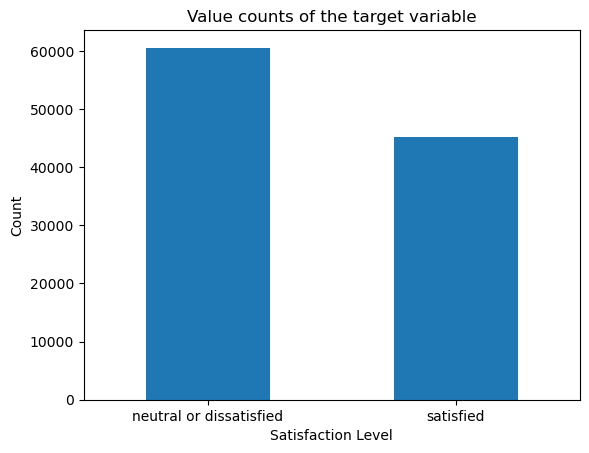

In [17]:
df.Satisfaction.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Satisfaction Level")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Type of Travel

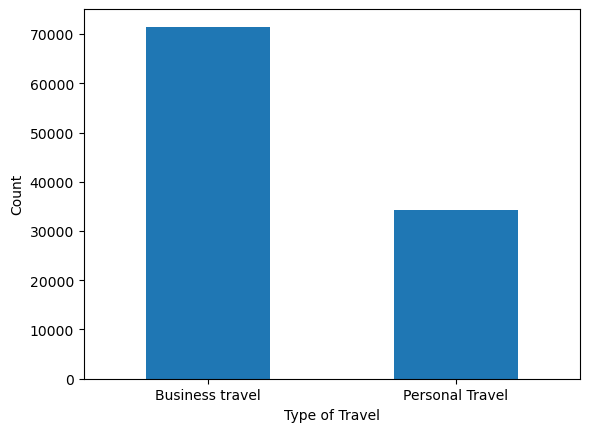

In [18]:
df["Type of Travel"].value_counts().plot(kind="bar")
plt.xlabel("Type of Travel")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Customer Type

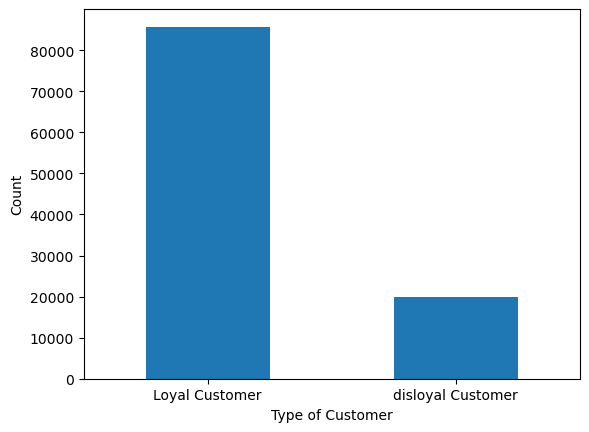

In [19]:
df["Customer Type"].value_counts().plot(kind="bar")
plt.xlabel("Type of Customer")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Age

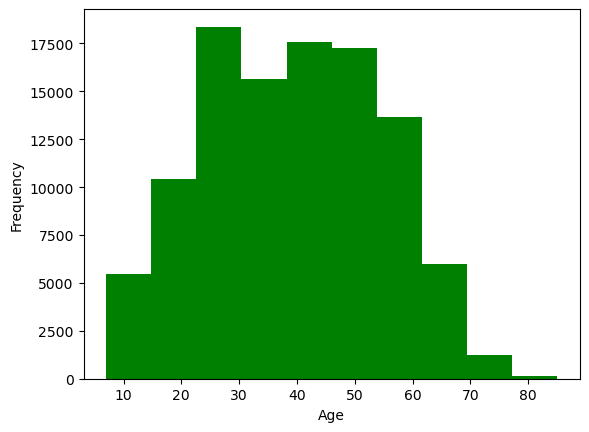

In [20]:
plt.hist(df["Age"],color="green")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Flight Distance

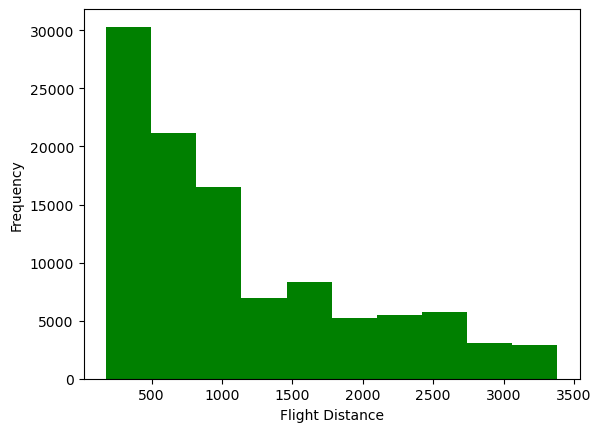

In [21]:
plt.hist(df["Flight Distance"],color="green")
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.show() 

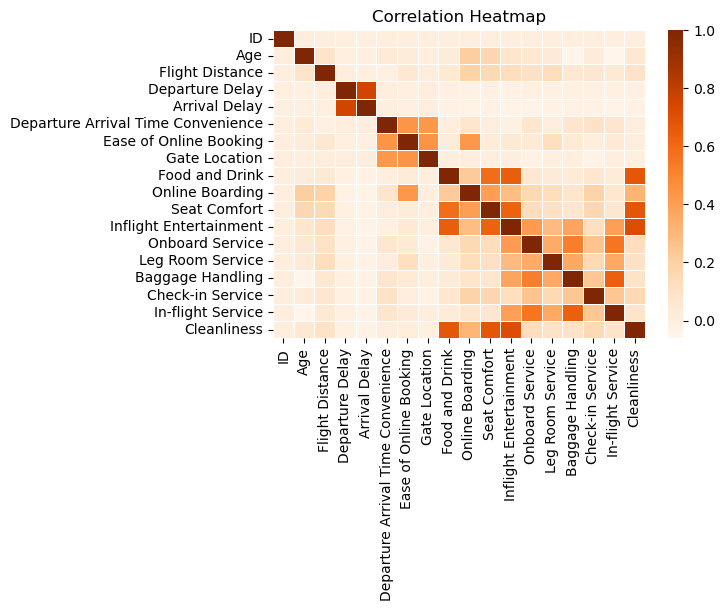

In [22]:
# Correlation among the variables
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, cmap="Oranges", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Visualization and Analysis

Here, our analysis is based on satisfaction level and returning rate

In [23]:
# Look at Age value counts for binning
Age_counts = df.Age.value_counts()
Age_counts

Age
39    2937
25    2925
40    2576
44    2491
41    2475
      ... 
76      48
74      44
79      37
78      32
85      14
Name: count, Length: 75, dtype: int64

In [24]:
# Create bins for age
bins = [0, 18, 30, 60, 100]
category = ['Minor','Young Adult','Adult','Elderly']
df['Age_category'] = pd.cut(df['Age'], bins, labels=category)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

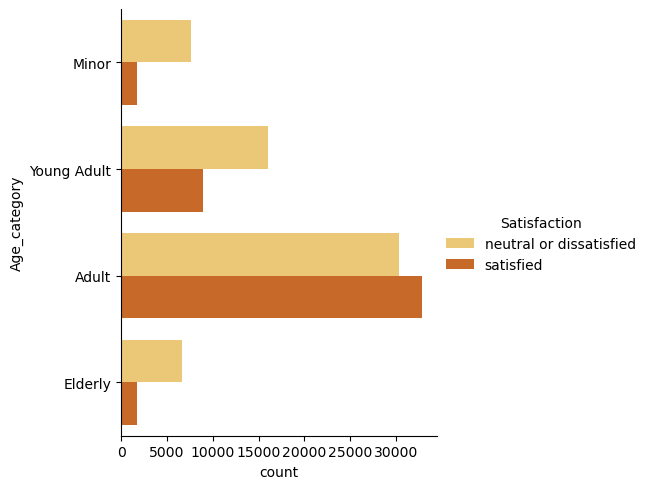

In [25]:
sns.catplot(y="Age_category", hue="Satisfaction", kind="count",
            palette="YlOrBr",
            data=df)

We can see that minor, young adult and elderly people are neutral or dissatisfied with the flight service whereas adult are more satisfied

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


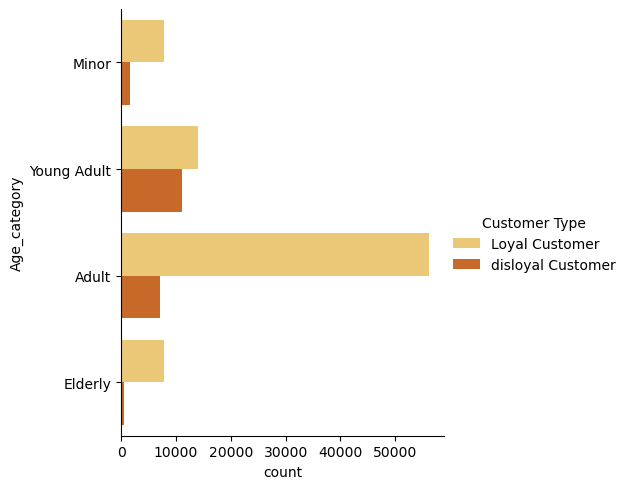

In [26]:
# Passenger returning rate based on Age
sns.catplot(y="Age_category", hue="Customer Type", kind="count",
            palette="YlOrBr",
            data=df)

Adult are more likely to return than passenger of other age groups

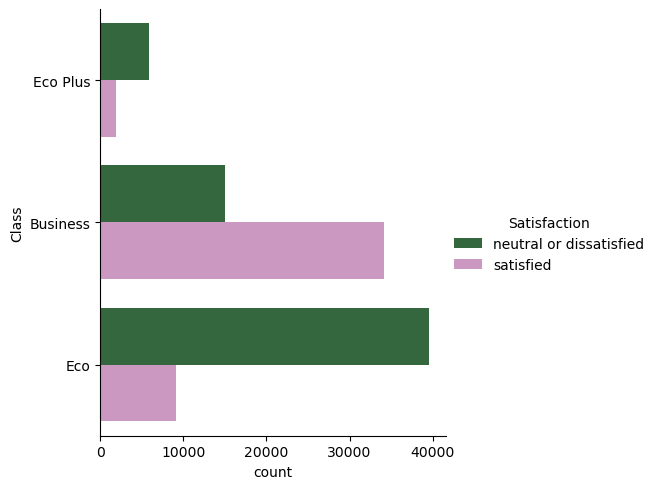

In [27]:
# Passenger satisfaction based on class
sns.catplot(y="Class", hue="Satisfaction", kind="count",
            palette="cubehelix",
            data=df)

We can see that business class passenger are more satisfied with the flight service whereas economy class passenger hare highly dissatisfied followed by Economy Plus class passenger

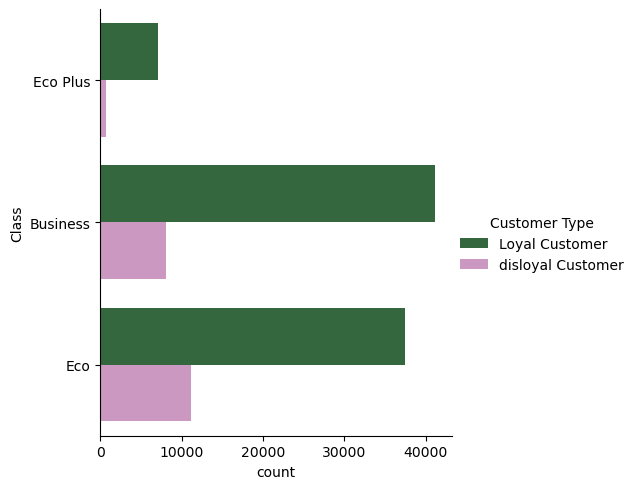

In [28]:
# Passenger returning rate based on Class
sns.catplot(y="Class", hue="Customer Type", kind="count",
            palette="cubehelix",
            data=df)

We can see that business class passenger have higher returing rate than other class

In [29]:
# Look at Flight distance counts for binning
Flight_counts = df["Flight Distance"].value_counts()
Flight_counts

Flight Distance
337     755
594     461
404     448
2475    434
862     429
       ... 
885       1
1421      1
877       1
1492      1
884       1
Name: count, Length: 3099, dtype: int64

In [30]:
# Create bins for flght distance
bins = [0, 1000, 2500, 5000]
category = ['Short Haul','Medium Haul','Long Haul']
df['flight_distance'] = pd.cut(df['Flight Distance'], bins, labels=category)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

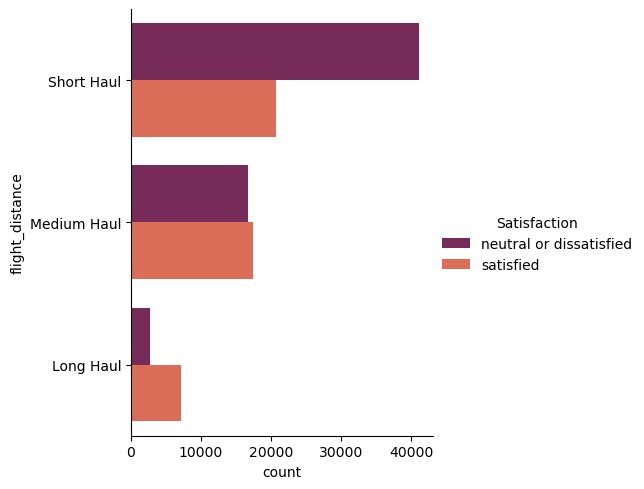

In [31]:
sns.catplot(y="flight_distance", hue="Satisfaction", kind="count",
            palette="rocket",
            data=df)

We can see that passenger in short haul flight are more dissatisfied with the flight service than medium haul and long haul flights.

In [32]:
# Passenger returning rate based on flight distance
df_distance = df[["flight_distance", "Customer Type"]]
df_distance=(df_distance.groupby("flight_distance")["Customer Type"].value_counts())/df['Customer Type'].value_counts()['Loyal Customer']
df_distance

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17472\52302005.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_distance=(df_distance.groupby("flight_distance")["Customer Type"].value_counts())/df['Customer Type'].value_counts()['Loyal Customer']


flight_distance  Customer Type    
Short Haul       Loyal Customer       0.545340
                 disloyal Customer    0.175678
Medium Haul      Loyal Customer       0.341777
                 disloyal Customer    0.055502
Long Haul        Loyal Customer       0.112883
                 disloyal Customer    0.002334
Name: count, dtype: float64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

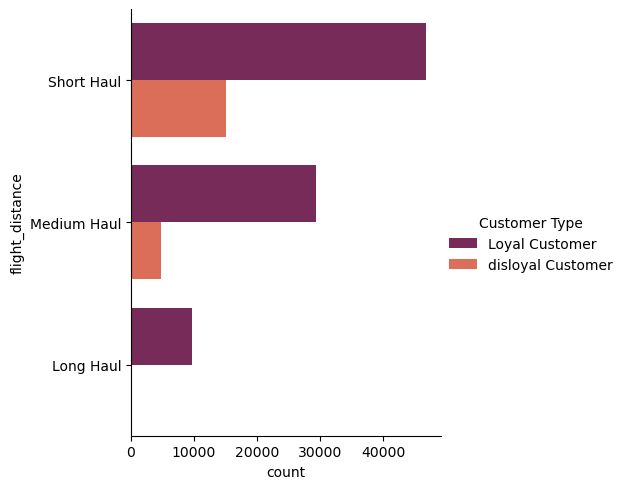

In [33]:
sns.catplot(y="flight_distance", hue="Customer Type", kind="count",
            palette="rocket",
            data=df)

We can see that short haul passenger have higher returning rate of 54.53% than in medium haul flights (34.17%) followed by long haul flights (11.28%)

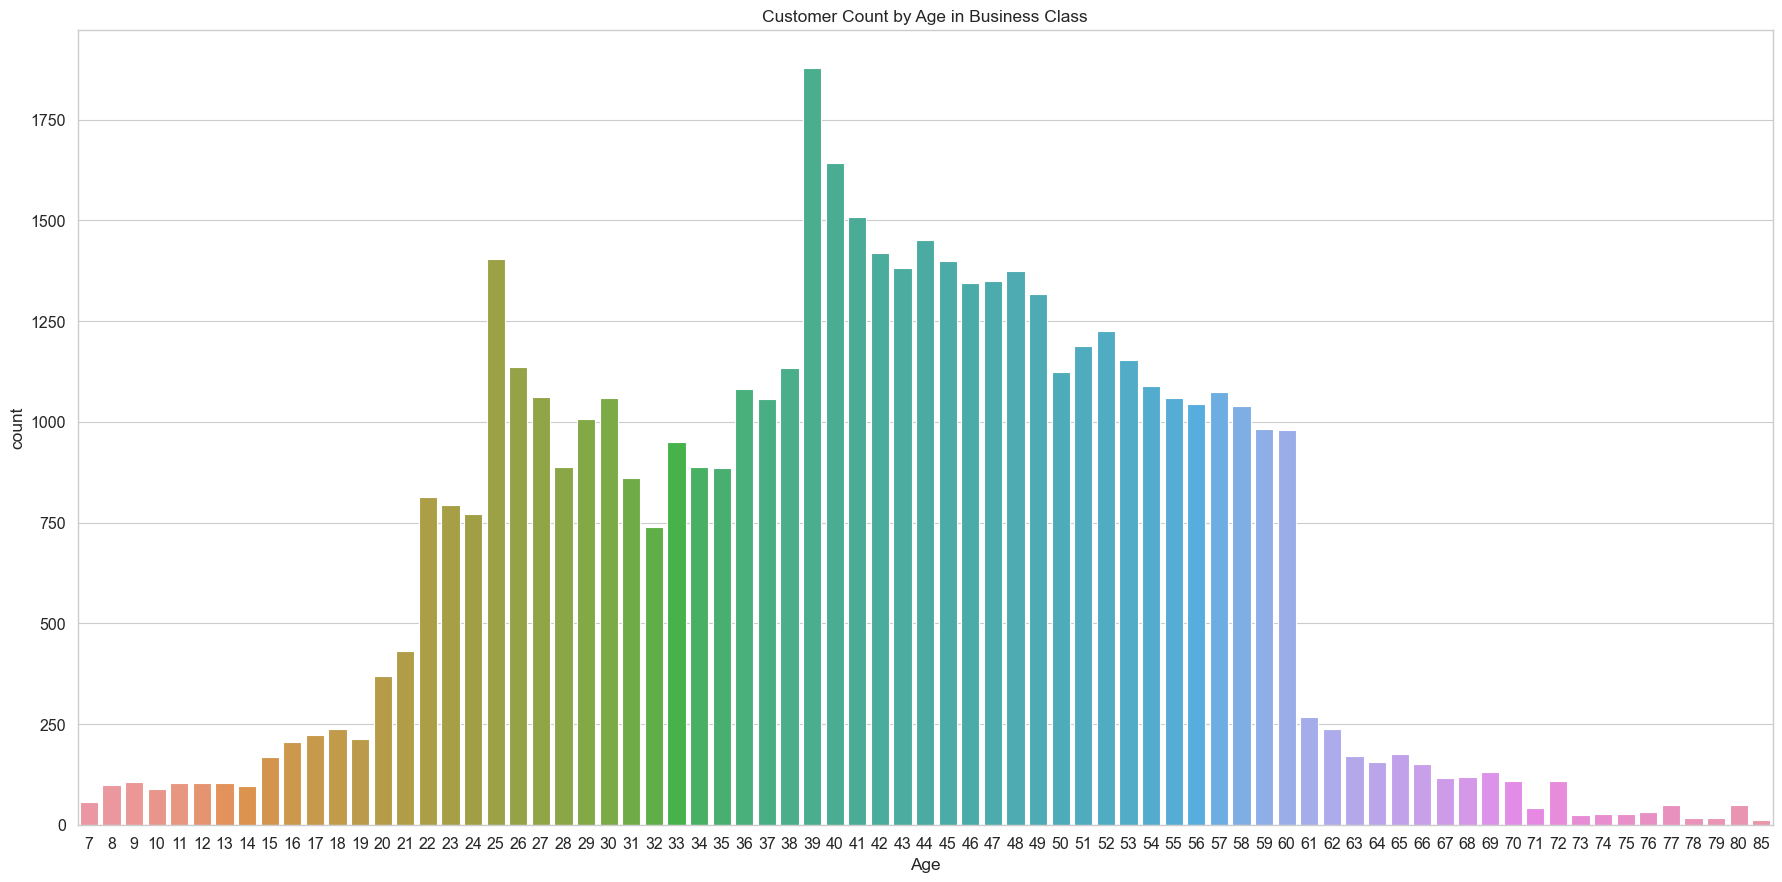

In [34]:
## show the business class
df_business=df[df['Class']=='Business']
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_business,x='Age')
ax.set_title('Customer Count by Age in Business Class')
plt.tight_layout()
plt.show()

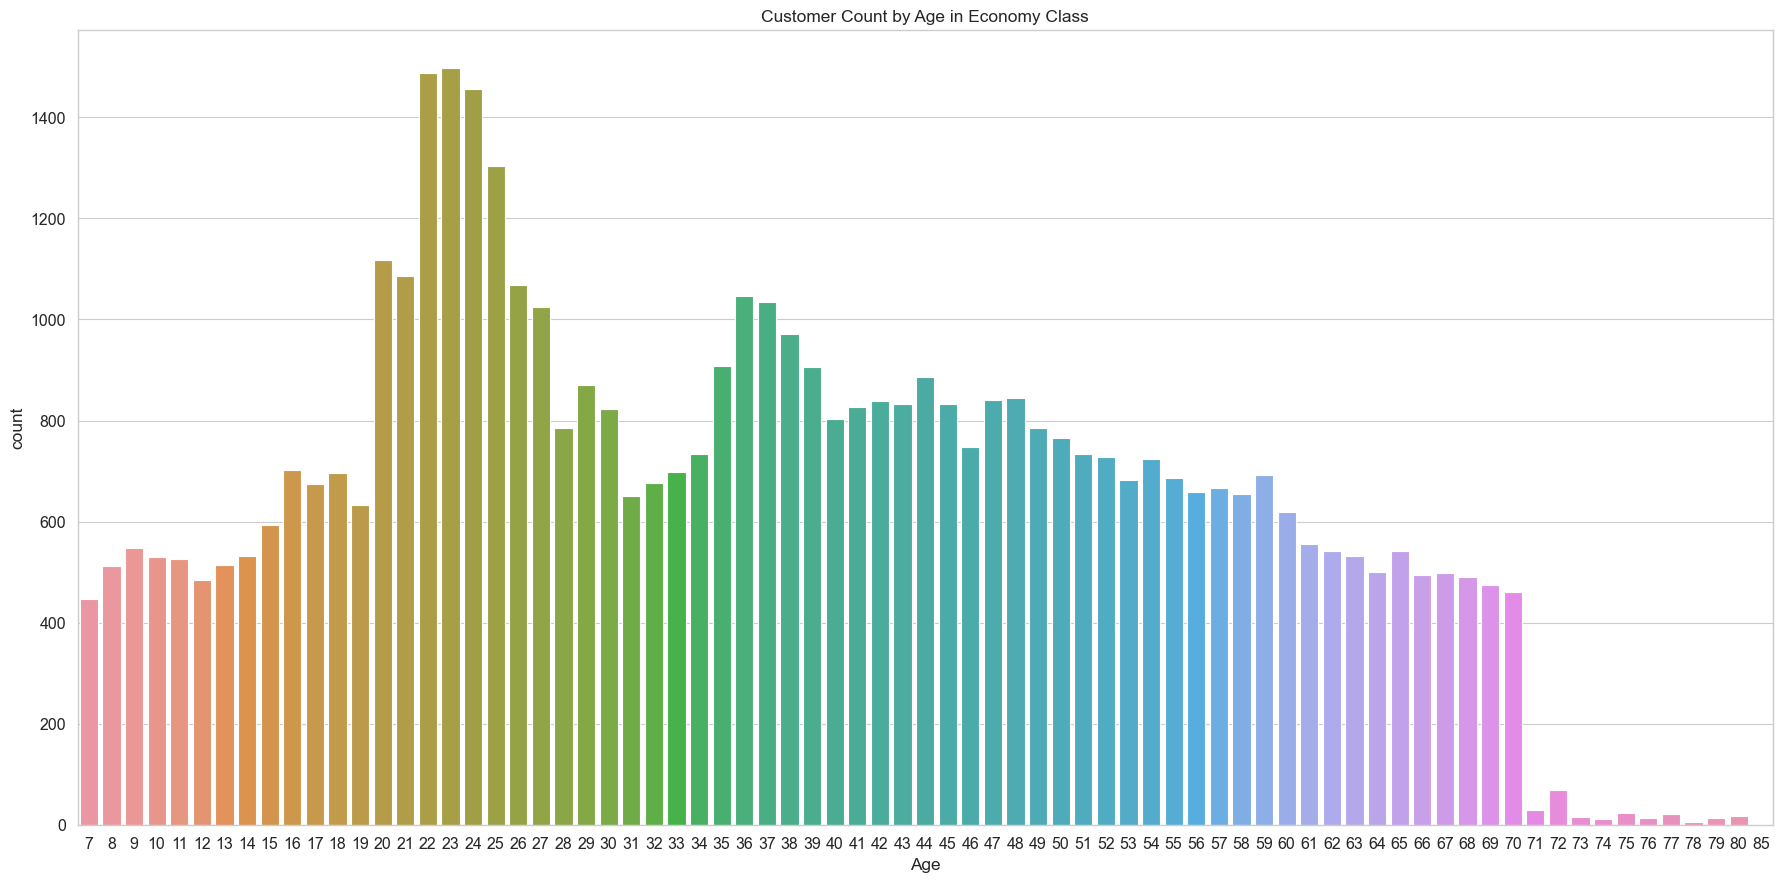

In [35]:
## show the Economy class
df_economy=df[df['Class']=='Eco']
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_economy,x='Age')
ax.set_title('Customer Count by Age in Economy Class')
plt.tight_layout()
plt.show()

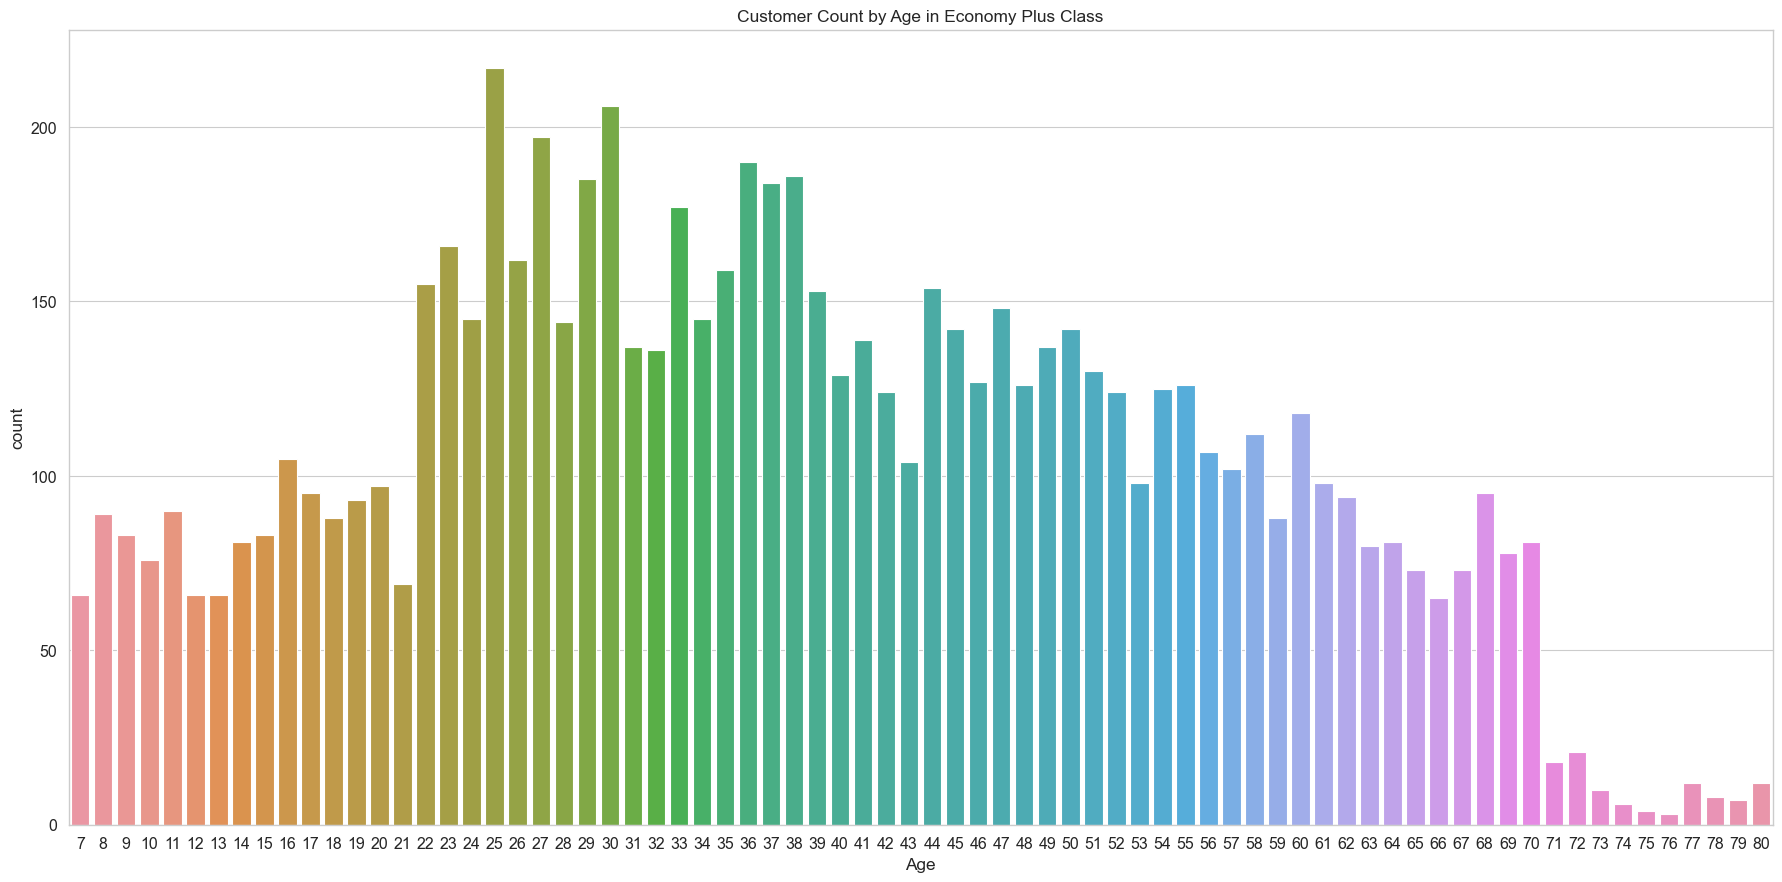

In [36]:
## show the Economy plus class
df_economyplus=df[df['Class']=='Eco Plus']
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_economyplus,x='Age')
ax.set_title('Customer Count by Age in Economy Plus Class')
plt.tight_layout()
plt.show()

In [37]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure Arrival Time Convenience,...,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Satisfaction,Age_category,flight_distance
0,1.0,Male,13,Loyal Customer,Personal Travel,Eco Plus,460,25,18.0,4,...,5,4,3,4,4,5,5,neutral or dissatisfied,Minor,Short Haul
1,2.0,Male,25,disloyal Customer,Business travel,Business,235,1,6.0,2,...,1,1,5,3,1,4,1,neutral or dissatisfied,Young Adult,Short Haul
2,3.0,Female,26,Loyal Customer,Business travel,Business,1142,0,0.0,2,...,5,4,3,4,4,4,5,satisfied,Young Adult,Medium Haul
3,4.0,Female,25,Loyal Customer,Business travel,Business,562,11,9.0,5,...,2,2,5,3,1,4,2,neutral or dissatisfied,Young Adult,Short Haul
4,5.0,Male,61,Loyal Customer,Business travel,Business,214,0,0.0,3,...,3,3,4,4,3,3,3,satisfied,Elderly,Short Haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876.0,Male,34,disloyal Customer,Business travel,Business,526,0,0.0,3,...,4,3,2,4,4,5,4,neutral or dissatisfied,Adult,Short Haul
129876,129877.0,Male,23,Loyal Customer,Business travel,Business,646,0,0.0,4,...,4,4,5,5,5,5,4,satisfied,Young Adult,Short Haul
129877,129878.0,Female,17,Loyal Customer,Personal Travel,Eco,828,0,0.0,5,...,2,4,3,4,5,4,2,neutral or dissatisfied,Minor,Short Haul
129878,129879.0,Male,14,Loyal Customer,Business travel,Business,1127,0,0.0,3,...,4,3,2,5,4,5,4,satisfied,Minor,Medium Haul


In [38]:
# Import label encoder
from sklearn import preprocessing

In [39]:
label_encoder = preprocessing.LabelEncoder()

In [40]:
# Convert all categorical variable into numerical variable
df['Age_category']= label_encoder.fit_transform(df['Age_category'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['flight_distance']= label_encoder.fit_transform(df['flight_distance'])
df['Customer Type']= label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel']= label_encoder.fit_transform(df['Type of Travel'])
df['Class']= label_encoder.fit_transform(df['Class'])
df['Satisfaction']= label_encoder.fit_transform(df['Satisfaction'])

# Feature Selection based on RFE

In [41]:
# Create our features
X = df.drop(["Satisfaction","ID"],axis=1)

# Create our target
y = df.Satisfaction

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Fit a Recursive Feature Elimination model
rfecv = RFECV(estimator=DecisionTreeClassifier(), 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)
RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

In [44]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 21


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


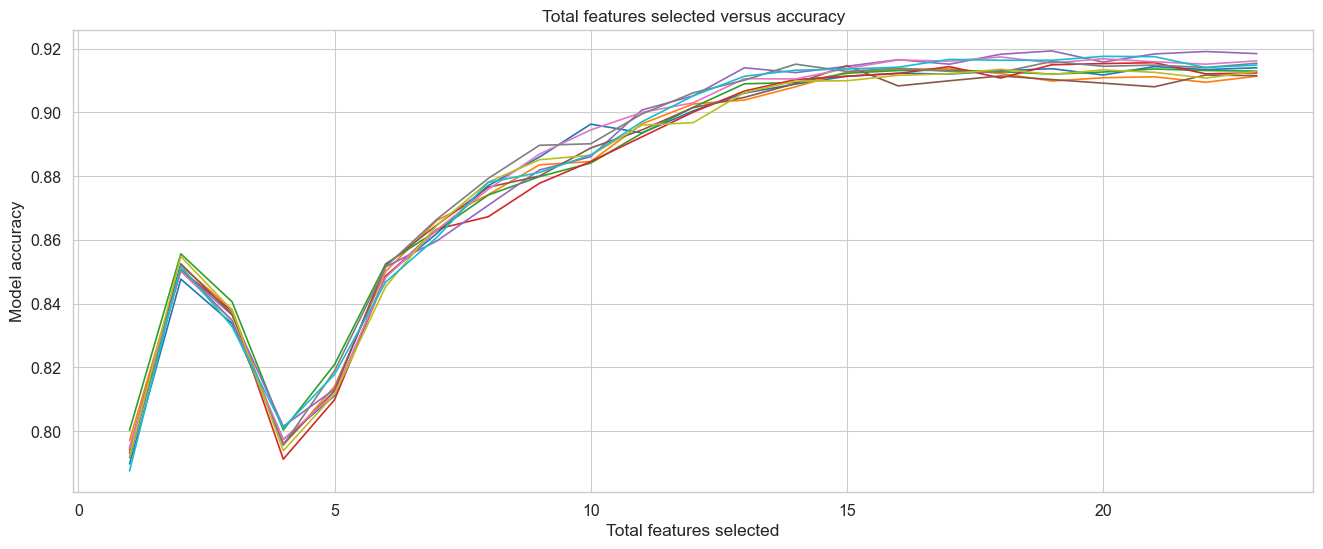

In [45]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [46]:
#Identifying the features RFE selected

rows = []

# Iterate over each feature
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    rows.append(row)

# Create the DataFrame from the list of rows
df_features = pd.DataFrame(rows)

# Sort by ranking and display the top 10 features
top_features = df_features.sort_values(by='ranking').head(10)
print(top_features)

                   feature  support  ranking
11          Food and Drink     True        1
18        Check-in Service     True        1
17        Baggage Handling     True        1
16        Leg Room Service     True        1
15         Onboard Service     True        1
14  Inflight Entertainment     True        1
13            Seat Comfort     True        1
12         Online Boarding     True        1
21            Age_category     True        1
19       In-flight Service     True        1


In [47]:
selected_features = rfecv.get_support(1)
X = df[df.columns[selected_features]]
X

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure Arrival Time Convenience,Ease of Online Booking,...,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness
0,1,13,0,1,2,460,25,18.0,4,3,...,5,3,5,5,4,3,4,4,5,5
1,1,25,1,0,0,235,1,6.0,2,3,...,1,3,1,1,1,5,3,1,4,1
2,0,26,0,0,0,1142,0,0.0,2,2,...,5,5,5,5,4,3,4,4,4,5
3,0,25,0,0,0,562,11,9.0,5,5,...,2,2,2,2,2,5,3,1,4,2
4,1,61,0,0,0,214,0,0.0,3,3,...,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,34,1,0,0,526,0,0.0,3,3,...,4,3,4,4,3,2,4,4,5,4
129876,1,23,0,0,0,646,0,0.0,4,4,...,4,4,4,4,4,5,5,5,5,4
129877,0,17,0,1,1,828,0,0.0,5,1,...,2,1,2,2,4,3,4,5,4,2
129878,1,14,0,0,0,1127,0,0.0,3,3,...,4,4,4,4,3,2,5,4,5,4


# Model Prediction


### Decision Tree Classifier

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,train_size=0.80)

In [49]:
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [50]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(84577, 21)
(21145, 21)
(84577,)
(21145,)


In [51]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [53]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)

In [54]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [55]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [56]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,11199,959
Actual 1,910,8077


Accuracy Score : 0.9116103097659021
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12158
           1       0.89      0.90      0.90      8987

    accuracy                           0.91     21145
   macro avg       0.91      0.91      0.91     21145
weighted avg       0.91      0.91      0.91     21145



In [57]:
importances = model.feature_importances_
importances

array([0.0036149 , 0.03490952, 0.04717988, 0.15212394, 0.02938981,
       0.04575192, 0.01118496, 0.01221389, 0.0093388 , 0.0681761 ,
       0.00976138, 0.00710869, 0.36562025, 0.02162689, 0.06243071,
       0.01278599, 0.0195109 , 0.01818381, 0.0340438 , 0.02085448,
       0.01418937])

                               feature  importance
0                               Gender    0.003615
11                      Food and Drink    0.007109
8   Departure Arrival Time Convenience    0.009339
10                       Gate Location    0.009761
6                      Departure Delay    0.011185
7                        Arrival Delay    0.012214
15                     Onboard Service    0.012786
20                         Cleanliness    0.014189
17                    Baggage Handling    0.018184
16                    Leg Room Service    0.019511
19                   In-flight Service    0.020854
13                        Seat Comfort    0.021627
4                                Class    0.029390
18                    Check-in Service    0.034044
1                                  Age    0.034910
5                      Flight Distance    0.045752
2                        Customer Type    0.047180
14              Inflight Entertainment    0.062431
9               Ease of Online 

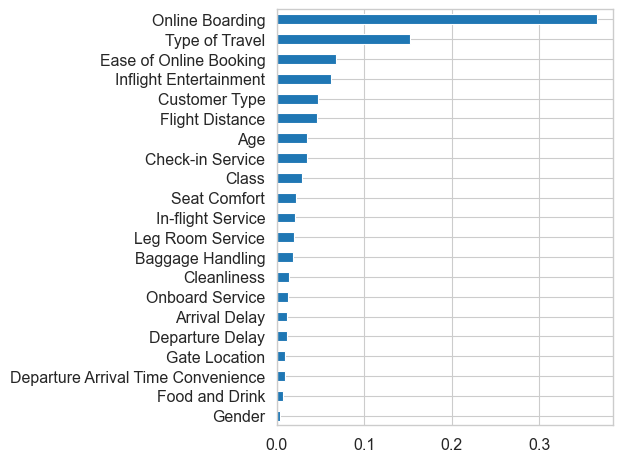

In [58]:
# Sort the features by their importance.
feature_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_df = feature_df.sort_values('importance')
print(feature_df)

ax = feature_df.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()